<a href="https://colab.research.google.com/github/rajan-dhinoja/Multiple_Disease_Prediction/blob/main/notebook_files/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Heart Disease Prediction**
---



# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

print("✅ Required Libraries are Imported - Done!\n")

✅ Required Libraries are Imported - Done!



## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [2]:
# dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/CLASSIFICATION/Multiple_Diseases/heart.csv'))
dataset = pd.DataFrame(pd.read_csv('../datasets/heart.csv'))
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


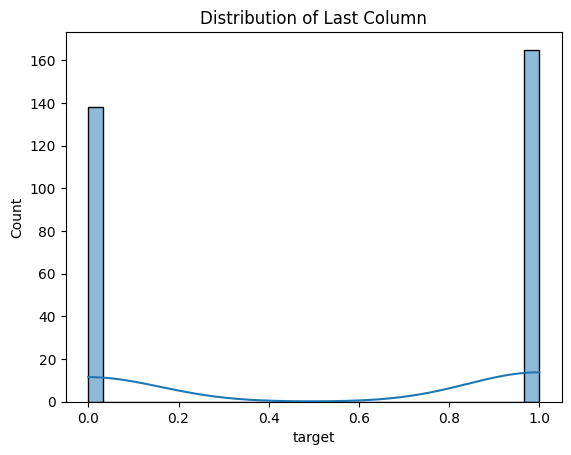

In [3]:
# Plot target distribution

# plt.figure(figsize=(10, 6))
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

In [4]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

if categorical_cols.empty:
  print("❌ No Categorical Columns Found...")
else:
  print("✅ Categorical Columns found: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("❌ No Numerical Columns Found...")
else:
  print("✅ Numerical Columns found: \n", numerical_cols)

❌ No Categorical Columns Found...
✅ Numerical Columns found: 
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [5]:
print("> Shape of the Dataset: ", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
# print(dataset.describe().map(lambda x: round(x, 4)))
print(dataset.describe().to_string(header=True))

> Shape of the Dataset:  (303, 14) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None 

> Statistical summary of the Dataset:
         age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  oldpeak  slope     ca   thal  t

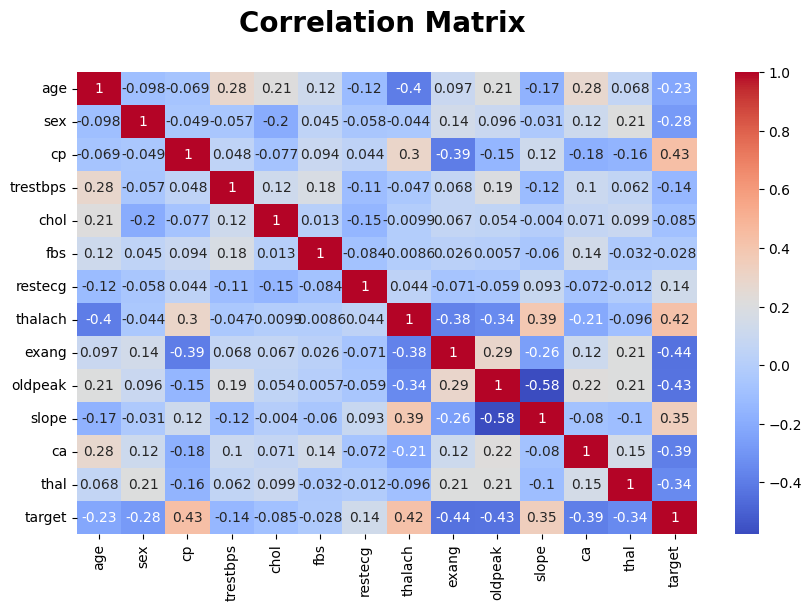

In [6]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [7]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("✅ Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("❌ No Duplicate Data(or Identical Rows) found...")

✅ Duplicate Data(or Identical Rows) found and Removed...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [8]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("⚠️ Missing Data Found! Handling them...\n")
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)
      print("\n")

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])
      print("✅ Missing Data Handled Successfully...")
      # print("New Data with replaced missing values: \n", dataset.head(10).to_string(header=True))
else:
    print("❌ No missing data found...")



❌ No missing data found...


### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [9]:
# for col in dataset.columns:
#   value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

#   print(f"Column: \t\t'{col}'")
#   print(value_counts_dataset.T.to_string(header=False), "\n")

### Step-3.4: Checking for Stopwords and Stemming them:-

In [10]:
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer

# if categorical_cols.any():

#   nltk.download('stopwords')

#   stop_words = set(stopwords.words('english'))
#   # stop_words = stop_words.remove('not')
#   # print("\n Stop Words are: ", stop_words, "\n")
#   def stemming(text):
#       words = text.lower().split()

#       stemmer = PorterStemmer()
#       stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
#       return ' '.join(stemmed_words)  # Join stemmed words back into a string

#   # Apply the stemming function to the specified columns
#   for column in categorical_cols:
#       dataset[column] = dataset[column].astype(str).apply(stemming)

#   print("✅ Stemming Completed Successfully... \n")
#   # print(dataset.head().to_string(header=True))
# else:
#   print("❌ No Stemming Needed...")

### Step-3.5: Checking any Categorical Data and Encoding them:-

In [11]:
import scipy.sparse
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# X = dataset.iloc[:, 1:-1]
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

repeating_cols = []
for col in categorical_cols:
    # Matrix of Feature
    if col != y.name:
      print(f"> String Values present in Column '{col}'.")
      # Check for repeating values within the categorical column
      value_counts = dataset[col].value_counts()
      repeating_values = value_counts[value_counts > 1].index.tolist()
      if repeating_values:
        repeating_cols.append(col)
        # print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
        print(f"\t- Also, Categorical values found in column '{col}'.")
        print(f"\t✅ '{col}' is Encoded Successfully...\n")

      else:
        print(f"\t❌ But No Categorical values found in column '{col}'.\n")

    # Dependent Variable/Output
    if col == y.name:
      print(f"> String Values present in Column '{col}'(Output Column).")
      # Check for repeating values within the categorical column
      value_counts = dataset[col].value_counts()
      repeating_values = value_counts[value_counts > 1].index.tolist()
      if repeating_values:
        # print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
        print(f"\t- Also, Categorical values found in column '{col}'.")
        le = LabelEncoder()
        y = le.fit_transform(dataset[col])
        print(f"\t✅ '{col}' is Encoded Successfully...\n")
      else:
        print(f"\t❌ But No Categorical values found in column '{col}'.\n")

print("=> Repeating Columns in Matrix of Features(X): ", repeating_cols, "\n")
if repeating_cols:
  encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), repeating_cols)], remainder='passthrough')
  encoder_transform = encoder.fit_transform(X)

  # Conditional conversion to dense array
  if scipy.sparse.issparse(encoder_transform):  # Check if sparse
    X = encoder_transform.toarray()
  else:
    X = encoder_transform

else:
  print("❌ No Repeating Columns found in Matrix of Features(X). \n")

# print("Matrix of Features(X): \n", pd.DataFrame(X).head().to_string(header=True))
print("\n")
# print("Dependent Variable(y): \n", pd.DataFrame(y).head().to_string(header=False, index=False))


=> Repeating Columns in Matrix of Features(X):  [] 

❌ No Repeating Columns found in Matrix of Features(X). 





## Step-4: Split the Dataset into the Training set and Test set:-

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data Splitted Successfully...\n")

# print("Printing Training Sets: ")
# print("> X_train: \n", (pd.DataFrame(X_train).head()).to_string(), "\n")
# print("> X_test: \n", (pd.DataFrame(X_test).head()).to_string(), "\n")
# print("\n")
# print("Printing Test Sets: ")
# print("> y_train: \n", (pd.DataFrame(y_train).head()).to_string(header=False), "\n")
# print("> y_test: \n", (pd.DataFrame(y_test).head()).to_string(header=False), "\n")

✅ Data Splitted Successfully...



## Step-5: Feature Scaling:-

In [13]:
""" Here we are not applying Feature Scaling in Dependent Variable (y), because there are only 0 and 1 values in y """
# StandardScaler class from scikit-learn, which is a tool for standardization and Normalization.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Convert X_train and X_test to NumPy arrays if they are DataFrames
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Iterate through columns of X_train and X_test
for col in range(X_train.shape[1]):  # Use range to get column indices
    # Check if all values in the column are 0 or 1
    if np.all(np.isin(X_train[:, col], [0, 1])):
        continue  # Skip scaling for this column
    else:
        # Reshape the column before scaling
        X_train[:, col] = scaler.fit_transform(X_train[:, col].reshape(-1, 1)).flatten()
        X_test[:, col] = scaler.transform(X_test[:, col].reshape(-1, 1)).flatten()

print("✅ Feature Scaling is Done Successfully...\n")

# print("Printing Training Sets after Feature Scaling:")
# print("> X_train: \n", (pd.DataFrame(X_train).head()).to_string(), "\n")
# print("\n")
# print("Printing Test Sets after Feature Scaling:")
# print("> X_test: \n", (pd.DataFrame(X_test).head()).to_string(), "\n")
# print("\n")
# print(pd.DataFrame(X).head().to_string())

✅ Feature Scaling is Done Successfully...



# ***Step-B: Model Builing & Evaluation...***

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB

models = {
  GaussianNB()
}

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # cv_score = cross_val_score(model, X_train, y_train, cv=5)
  print(f"✅ {model.__class__.__name__} is trained Sucessfully...")
  print(f"-> {model.__class__.__name__}:-")
  print(f"  Accuracy: \t {accuracy_score(y_test, y_pred):.2f}")
  print(f"  Precision: \t {precision_score(y_test, y_pred):.2f}")
  print(f"  Recall: \t\t {recall_score(y_test, y_pred):.2f}")
  print(f"  F1 Score: \t {f1_score(y_test, y_pred):.2f}")
  print(f"  ROC-AUC Score: {roc_auc_score(y_test, y_pred):.2f}\n")

✅ GaussianNB is trained Sucessfully...
-> GaussianNB:-
  Accuracy: 	 0.89
  Precision: 	 0.93
  Recall: 		 0.84
  F1 Score: 	 0.89
  ROC-AUC Score: 0.89



# ***Step-C: Saving the Model & Testing It...***

## Step-1: Saving the Model(.sav):-

In [15]:
import joblib

joblib.dump(model, f'../saved_models/{model.__class__.__name__}_for_HEART.pkl')
print(f"✅ Model saved: {model.__class__.__name__}_for_HEART.pkl")

✅ Model saved: GaussianNB_for_HEART.pkl


## Step-2: Predicting and Testing the Model:-

In [16]:
correct_predictions = 0
max_correct_predictions = 0
model_predictions = {} # dictionary to store model and their correct predictions

random_value = np.random.randint(3, 5)
print("Number of Inputs for Predction: ", random_value, "\n")

for i in range(random_value):
  sample_input = pd.DataFrame(X_train).iloc[i].values.reshape(1, -1)  # Convert a row to an array
  sample_output = round(y_train[i], 2)

  print("Before Predicting, Sample Data & Output Sales are:-")
  print("> Sample Data: ", sample_input)
  print("> Output: ",sample_output, "\n")

  model = joblib.load(f"../saved_models/{model.__class__.__name__}_for_HEART.pkl")
  prediction = model.predict(sample_input)
  rounded_prediction = round(prediction[0], 2)
  print(f" - Predicted Sales: {rounded_prediction:.2f}")

  if rounded_prediction == sample_output:
      correct_predictions += 1
      print("\t✅ Nice Work! your Prediction is correct...\n")
      # increment correct prediction count for the model in the dictionary
      model_predictions[model.__class__.__name__] = model_predictions.get(model.__class__.__name__, 0) + 1
  else:
      print("\t❌ Oops! your Prediction is incorrect...\n")

  print("="*75, "\n")

Number of Inputs for Predction:  4 

Before Predicting, Sample Data & Output Sales are:-
> Sample Data:  [[-1.35 1.00 0.00 -0.63 0.93 0.00 0.89 0.55 0.00 -0.90 0.97 -0.68 -0.55]]
> Output:  1 

 - Predicted Sales: 1.00
	✅ Nice Work! your Prediction is correct...


Before Predicting, Sample Data & Output Sales are:-
> Sample Data:  [[1.49 1.00 0.97 2.75 0.53 1.00 -0.99 0.01 1.00 0.54 -0.68 -0.68 1.14]]
> Output:  1 

 - Predicted Sales: 0.00
	❌ Oops! your Prediction is incorrect...


Before Predicting, Sample Data & Output Sales are:-
> Sample Data:  [[1.38 1.00 -0.97 -0.35 0.15 1.00 0.89 0.59 0.00 -0.72 -0.68 1.35 1.14]]
> Output:  1 

 - Predicted Sales: 0.00
	❌ Oops! your Prediction is incorrect...


Before Predicting, Sample Data & Output Sales are:-
> Sample Data:  [[0.07 0.00 0.00 0.22 0.07 0.00 -0.99 0.50 0.00 0.36 -0.68 -0.68 -0.55]]
> Output:  1 

 - Predicted Sales: 1.00
	✅ Nice Work! your Prediction is correct...




In [17]:
# Instead of using max, we'll iterate and check for at least one correct prediction
models_with_correct_predictions = []  # List to store models with at least one correct prediction

for model_name, correct_count in model_predictions.items():
    if correct_count >= 1:  # Check for at least one correct prediction
        models_with_correct_predictions.append(model_name)

# Print the results
if models_with_correct_predictions:
    for model_name in models_with_correct_predictions:
        print(f"- ✅ '{model_name}' has achieved:\n\t\t\t '{model_predictions[model_name]}' out of {random_value} correct predictions")
else:
    print("No models achieved any correct predictions on the samples.")

- ✅ 'GaussianNB' has achieved:
			 '2' out of 4 correct predictions


## Step-3: Predicting the Result from saved Model:-

In [18]:
# random_input = np.random.randint(1, 50)
# print(f"Row '{random_input}' for Predction: \n")

# input_data = pd.DataFrame(X).iloc[random_input]  # Convert a row to an array
# # changing input data to a numpy array
# input_data_as_array = np.asarray(input_data).reshape(1,-1)

# feature_names = pd.DataFrame(X).columns  # Get the feature names (column names)

# # Create a dictionary of feature names and values for the selected row
# input_data_dict = dict(zip(feature_names, input_data.values))
# max_feature_name_length = max(len(name) for name in feature_names)

# for feature_name, value in input_data_dict.items():
#     print(f"{feature_name:{max_feature_name_length}} = \t{value}")  # Alignment using string formatting
# print("\n")  # Add a newline for better readability

# model = pickle.load(open(f"GaussianNB.sav", "rb"))

# prediction = model.predict(input_data_as_array)
# print(f"{'Outcome_Prediction':{max_feature_name_length}} = \t{prediction[0]}", "\n")  # Alignment for prediction

# if (prediction[0] == 0):
#   print("😃 Yeah! The Person does not have Heart Disease...")

# else:
#   print("⚠️ Oops! The Person has a Heart Disease...")